In [1]:
import pandas as pd
import numpy as np
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure, imshow, axis
from matplotlib.image import imread
import seaborn as sns
import nltk
import difflib
from sklearn.decomposition import LatentDirichletAllocation


pd.options.display.max_columns=999
pd.options.display.max_rows=999

In [2]:
def show_card(name=None,show=False):
    if name is None:
        card_name = input('Enter the name of a commander: ').strip()
        if card_name.lower()=='exit':
            return
    else:
        card_name = name
    try:
        card = commanders[commanders.index.str.lower()==card_name.lower()]
        response = requests.get(card.image_uris.tolist()[0]['normal'])
    except:
        closest = difflib.get_close_matches(card_name,commanders.index.tolist(),len(commanders.index.tolist()),0)[0]
        print(f"Could not find {card_name}. Instead showing {closest}.")
        card = commanders[commanders.index==closest]
        response = requests.get(card.image_uris.tolist()[0]['normal'])
    img = Image.open(BytesIO(response.content))
    if show==True:
        display(img)
    return card.image_uris.tolist()[0]['normal']

# Load cards and drop columns

In [3]:
commanders = pd.read_json('Data/commander_legal.json')

In [4]:
commanders.columns

Index(['all_parts', 'artist', 'cmc', 'color_identity', 'color_indicator',
       'colors', 'edhrec_rank', 'games', 'highres_image', 'image_uris', 'lang',
       'layout', 'legalities', 'loyalty', 'mana_cost', 'name', 'oracle_text',
       'oversized', 'power', 'preview', 'printed_text', 'printed_type_line',
       'promo', 'released_at', 'reprint', 'reserved', 'scryfall_uri', 'set',
       'set_name', 'set_search_uri', 'tcgplayer_id', 'textless', 'toughness',
       'type_line', 'pop_cmdr', 'w', 'u', 'b', 'r', 'g', 'colorless', 'wu',
       'ub', 'br', 'rg', 'gw', 'wb', 'ur', 'bg', 'rw', 'gu', 'wub', 'ubr',
       'brg', 'rgw', 'gwu', 'wbg', 'urw', 'bgu', 'rwb', 'gur', 'wubr', 'ubrg',
       'brgw', 'rgwu', 'gwub', 'wubrg'],
      dtype='object')

**Only include legendary creatures with a normal layout and no partner mechanic**

In [5]:
commanders = commanders[commanders.type_line.str.contains('Legendary Creature')]

In [6]:
commanders = commanders[commanders.layout=='normal']

In [7]:
commanders = commanders[~commanders.oracle_text.str.contains('Partner')]

**Dataset includes reprints as a separate row, so drop those to have a unique list**

In [8]:
commanders.drop_duplicates('name','last',inplace=True)

**Set the index of my DataFrame to the card name**

In [9]:
commanders.set_index('name',inplace=True)

In [10]:
commanders.head()

,all_parts,artist,cmc,color_identity,color_indicator,colors,edhrec_rank,games,highres_image,image_uris,lang,layout,legalities,loyalty,mana_cost,oracle_text,oversized,power,preview,printed_text,printed_type_line,promo,released_at,reprint,reserved,scryfall_uri,set,set_name,set_search_uri,tcgplayer_id,textless,toughness,type_line,pop_cmdr,w,u,b,r,g,colorless,wu,ub,br,rg,gw,wb,ur,bg,rw,gu,wub,ubr,brg,rgw,gwu,wbg,urw,bgu,rwb,gur,wubr,ubrg,brgw,rgwu,gwub,wubrg
name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"Mavren Fein, Dusk Apostle","[{'object': 'related_card', 'id': 'f7294e40-11...",Daarken,3,[W],None,[W],2130.0,True,True,{'small': 'https://img.scryfall.com/cards/smal...,en,normal,legal,None,{2}{W},Whenever one or more nontoken Vampires you con...,False,2,None,NaN,NaN,False,2017-09-29,False,False,https://scryfall.com/card/xln/24/mavren-fein-d...,xln,Ixalan,https://api.scryfall.com/cards/search?order=se...,141996.0,False,2,Legendary Creature — Vampire Cleric,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
"Selvala, Heart of the Wilds",None,Tyler Jacobson,3,[G],None,[G],1283.0,True,True,{'small': 'https://img.scryfall.com/cards/smal...,en,normal,legal,None,{1}{G}{G},Whenever another creature enters the battlefie...,False,2,None,NaN,NaN,False,2019-11-07,True,False,https://scryfall.com/card/mb1/1330/selvala-hea...,mb1,Mystery Booster,https://api.scryfall.com/cards/search?order=se...,203506.0,False,3,Legendary Creature — Elf Scout,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Vela the Night-Clad,None,Allen Williams,6,"[B, U]",None,"[B, U]",2465.0,True,True,{'small': 'https://img.scryfall.com/cards/smal...,en,normal,legal,None,{4}{U}{B},Intimidate (This creature can't be blocked exc...,False,4,None,NaN,NaN,False,2017-08-25,True,False,https://scryfall.com/card/c17/201/vela-the-nig...,c17,Commander 2017,https://api.scryfall.com/cards/search?order=se...,140065.0,False,4,Legendary Creature — Human Wizard,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
"Teneb, the Harvester",None,Zoltan Boros & Gabor Szikszai,6,"[B, G, W]",None,"[B, G, W]",1819.0,True,True,{'small': 'https://img.scryfall.com/cards/smal...,en,normal,legal,None,{3}{W}{B}{G},"Flying\nWhenever Teneb, the Harvester deals co...",False,6,None,NaN,NaN,False,2017-08-25,True,False,https://scryfall.com/card/c17/198/teneb-the-ha...,c17,Commander 2017,https://api.scryfall.com/cards/search?order=se...,140056.0,False,6,Legendary Creature — Dragon,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
"Silumgar, the Drifting Death",None,Steven Belledin,6,"[B, U]",None,"[B, U]",1815.0,True,True,{'small': 'https://img.scryfall.com/cards/smal...,en,normal,legal,None,{4}{U}{B},"Flying, hexproof\nWhenever a Dragon you contro...",False,3,None,NaN,NaN,False,2017-08-25,True,False,https://scryfall.com/card/c17/194/silumgar-the...,c17,Commander 2017,https://api.scryfall.com/cards/search?order=se...,140034.0,False,7,Legendary Creature — Dragon,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


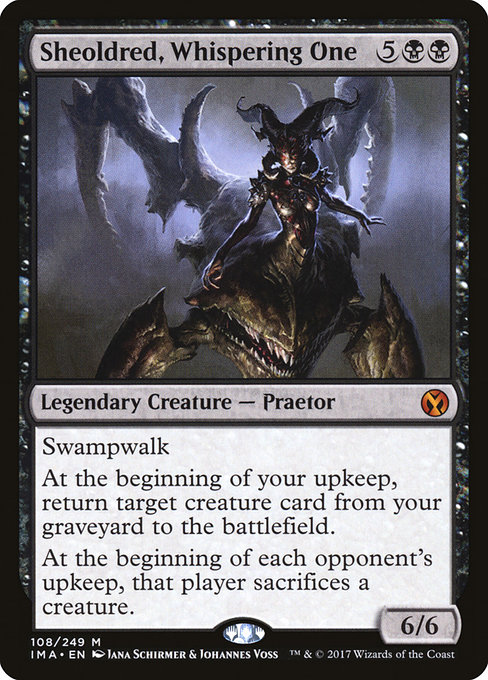

'https://img.scryfall.com/cards/normal/front/b/b/bbd672c9-46ae-4d2b-93d9-16271d2f71ff.jpg?1562853488'

In [13]:
show_card(commanders.sort_values('edhrec_rank').iloc[1].head().name,True)

## LDA to find topics of commanders

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import nltk
from nltk.corpus import stopwords

**Stopwords started with standard english stopwords and the names of the cards. Other keywords were added manually after trial and error to see which words were appearing in too many topics at once**

In [15]:
stop = list(set(stopwords.words('english')))
names = [card_name.lower().replace(',','').split() for card_name in commanders.index]
for name in names:
    stop.extend(name)
stop += ['gain','give','each','among','least','less','choice','until','end','start','beginning','upkeep','may',
         'put','under','whenever','except','player','cost','turn','gets','get','pay','deals','control',
         'controls','color','order','lose','battlefield','target','spell','card','equal','ability','activate',
         'next','step','cast','owner','time','would','instead','number','onto','though','long',
         'choose','converted','mana','permanent','another','card','cards','horsemanship','flying','creature',
         'creatures','opponents','countered','divinity', 'divinity counter', 'enters opponent', 'equipment',
         'experience', 'name', 'type', 'vampire','create','creates','trample','reach','lifelink','first',
         'double','haste','strike','white','blue','black','red','green','becomes','all','vigilance','unless',
         'blocked','tap','tapped','untap','gains','reveal','return','add', 'opponent']
stop = list(set(stop))

In [17]:
texts = [text.strip().lower().replace('\n',' ') for text in commanders.oracle_text]

In [18]:
all_cards = pd.read_json('Data/commander_legal.json')
all_text = [text.strip().lower().split('\n') for text in commanders.oracle_text]
temp = []
for text in all_text:
    temp.extend(text)
all_text = temp
all_tf_vectorizer = CountVectorizer(max_df=0.9, min_df=10,stop_words=stop, analyzer='word',ngram_range=(1,2))
all_tf = all_tf_vectorizer.fit_transform(texts)
all_tf_feature_names = all_tf_vectorizer.get_feature_names()

/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:301: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ancestor', 'arms', 'ben', 'blossom', 'boar', 'cho', 'clad', 'corpse', 'counter', 'dal', 'devouring', 'dûl', 'eight', 'enters', 'eye', 'eyed', 'gilt', 'gitaxias', 'glass', 'gnawer', 'gold', 'half', 'heron', 'ihsan', 'il', 'ink', 'ishi', 'jiki', 'kagachi', 'kanar', 'kiki', 'kin', 'kuar', 'lim', 'manno', 'maro', 'marrow', 'mizzet', 'mors', 'nature', 'nephalia', 'night', 'niv', 'opal', 'palladia', 'phoenix', 'praetors', 'raze', 'rrik', 'sanity', 'scar', 'seasons', 'sek', 'selesnya', 'ship', 'shizo', 'sleeping', 'sol', 'spinner', 'striped', 'tail', 'tails', 'thousand', 'ur', 'yavimaya', 'zo', 'zu'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [19]:
tf_vectorizer = CountVectorizer(max_df=0.9, min_df=10,stop_words=stop, analyzer='word',ngram_range=(1,2)) # max_df=0.95, min_df=10,
tf = tf_vectorizer.fit_transform(texts)
tf_feature_names = tf_vectorizer.get_feature_names()

/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:301: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ancestor', 'arms', 'ben', 'blossom', 'boar', 'cho', 'clad', 'corpse', 'counter', 'dal', 'devouring', 'dûl', 'eight', 'enters', 'eye', 'eyed', 'gilt', 'gitaxias', 'glass', 'gnawer', 'gold', 'half', 'heron', 'ihsan', 'il', 'ink', 'ishi', 'jiki', 'kagachi', 'kanar', 'kiki', 'kin', 'kuar', 'lim', 'manno', 'maro', 'marrow', 'mizzet', 'mors', 'nature', 'nephalia', 'night', 'niv', 'opal', 'palladia', 'phoenix', 'praetors', 'raze', 'rrik', 'sanity', 'scar', 'seasons', 'sek', 'selesnya', 'ship', 'shizo', 'sleeping', 'sol', 'spinner', 'striped', 'tail', 'tails', 'thousand', 'ur', 'yavimaya', 'zo', 'zu'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [20]:
sents = [text.strip().lower().split('\n') for text in commanders.oracle_text]
temp = []
for text in sents:
    temp.extend(text)
sents = temp

In [21]:
sents_tf_vectorizer = CountVectorizer(max_df=0.9, min_df=10,stop_words=stop, analyzer='word',ngram_range=(1,2)) # max_df=0.95, min_df=10,
sents_tf = sents_tf_vectorizer.fit_transform(sents)
sents_tf_feature_names = sents_tf_vectorizer.get_feature_names()

/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:301: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ancestor', 'arms', 'ben', 'blossom', 'boar', 'cho', 'clad', 'corpse', 'counter', 'dal', 'devouring', 'dûl', 'eight', 'enters', 'eye', 'eyed', 'gilt', 'gitaxias', 'glass', 'gnawer', 'gold', 'half', 'heron', 'ihsan', 'il', 'ink', 'ishi', 'jiki', 'kagachi', 'kanar', 'kiki', 'kin', 'kuar', 'lim', 'manno', 'maro', 'marrow', 'mizzet', 'mors', 'nature', 'nephalia', 'night', 'niv', 'opal', 'palladia', 'phoenix', 'praetors', 'raze', 'rrik', 'sanity', 'scar', 'seasons', 'sek', 'selesnya', 'ship', 'shizo', 'sleeping', 'sol', 'spinner', 'striped', 'tail', 'tails', 'thousand', 'ur', 'yavimaya', 'zo', 'zu'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [22]:
# I want less topics so that topics are more general and have more overlap
lda=LatentDirichletAllocation(n_components=5,random_state=30,verbose=0,n_jobs=-1,max_iter=50)

## Train the model on individual lines from all cards

In [23]:
# Train the LDA model on individual lines in card text to generate general topics.
# Then test it on full card text to determine the overall topic of the card based on its different effects
lda.fit(all_tf)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='batch', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=50, mean_change_tol=0.001,
             n_components=5, n_jobs=-1, n_topics=None, perp_tol=0.1,
             random_state=30, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

In [24]:
import joblib
joblib.dump(lda,'lda-count.pkl')

['lda-count.pkl']

In [25]:
lda = joblib.load('Pickled_Models/lda-count.pkl')

# Transform the model to predict on all text (multiple abilities) for commanders

In [26]:
def display_topics(model, feature_names, no_top_words):
    topics = []
    for topic_idx, topic in enumerate(model.components_):
        topics.append({topic_idx:[{feature_names[i]:topic[i]} for i in topic.argsort()[:-no_top_words-1:-1]]})
        print ("Topic %d:" % (topic_idx),end='\t')
        print ("\n\t\t".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]),end='\n\n')
    return topics

topic_words = display_topics(lda, all_tf_feature_names, 10)

Topic 0:	power
		library
		discard
		damage
		top
		dealt
		toughness
		top library
		bottom
		damage dealt

Topic 1:	counter
		counters
		enters
		spells
		dies
		indestructible
		permanents
		remove
		abilities
		lands

Topic 2:	token
		sacrifice
		artifact
		enters
		land
		destroy
		defending
		sacrifices
		untapped
		flash

Topic 3:	damage
		combat
		combat damage
		draw
		attacks
		attacking
		additional
		planeswalker
		attack
		draws

Topic 4:	graveyard
		library
		top
		sorcery
		copy
		shuffle
		instant
		search
		shuffle library
		search library



In [27]:
from wordcloud import WordCloud

In [28]:
topic_words[0]

{0: [{'power': 77.19110629832534},
  {'library': 49.4900460216666},
  {'discard': 34.19107485194372},
  {'damage': 33.87443704857581},
  {'top': 31.59789551908017},
  {'dealt': 28.193832838304324},
  {'toughness': 27.195252729730722},
  {'top library': 21.944950150012183},
  {'bottom': 19.198627722702877},
  {'damage dealt': 19.196687716032745}]}

In [29]:
def plot_wcs(topic_words):
    c=0
    for topic in topic_words:
        merged = {}
        for d in list(topic.values())[0]:
            merged.update(d)
        wc = WordCloud(background_color='white').generate_from_frequencies(merged)
        plt.title(f'Topic {c}',size=25)
        plt.imshow(wc,interpolation='bilinear')
        plt.xticks([])
        plt.yticks([])
        plt.show()
        c+=1

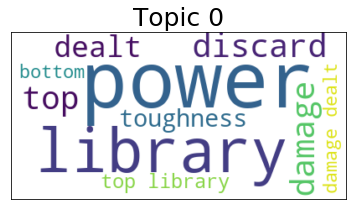

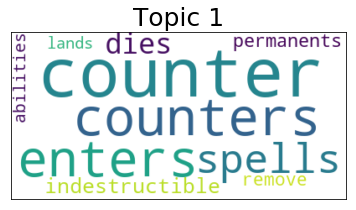

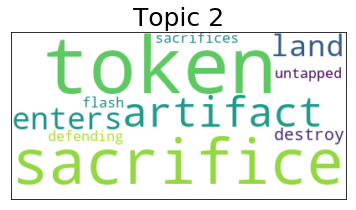

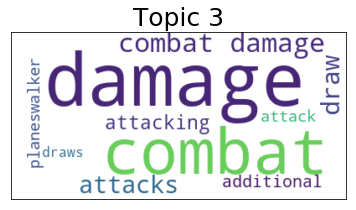

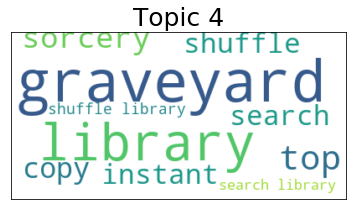

In [30]:
plot_wcs(topic_words)

**Manually look through the top words that describe each topic and relabel them to make sense**

In [31]:
cmdr_topics = pd.DataFrame(lda.transform(tf))
cmdr_topics.index = commanders.index
cmdr_topics.columns = ['Library Casters','Snowballing Effects','Army Makers','Fighters','Library Searchers']
cmdr_topics['edhrec_rank'] = commanders['edhrec_rank']

In [32]:
cmdr_topics.describe()

,Library Casters,Snowballing Effects,Army Makers,Fighters,Library Searchers,edhrec_rank
count,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000
mean,0.162730,0.210795,0.214110,0.218550,0.193815,5282.772099
std,0.221822,0.248016,0.239519,0.246169,0.247393,4339.498758
min,0.011249,0.011111,0.011134,0.011111,0.011403,224.000000
25%,0.033848,0.040000,0.040000,0.040000,0.040000,2126.250000
50%,0.066667,0.086280,0.100000,0.100000,0.066667,3867.500000
75%,0.200000,0.292754,0.333851,0.313149,0.200000,6998.000000
max,0.949481,0.926962,0.926323,0.918306,0.955394,19457.000000


In [33]:
cmdr_topics.sort_values('Snowballing Effects',ascending=False).head(10)

,Library Casters,Snowballing Effects,Army Makers,Fighters,Library Searchers,edhrec_rank
name,,,,,,
Myojin of Infinite Rage,0.018197,0.926962,0.018461,0.018187,0.018193,5954.0
Myojin of Seeing Winds,0.020052,0.919615,0.020038,0.020281,0.020013,3843.0
Myojin of Cleansing Fire,0.020011,0.919614,0.020355,0.020006,0.020013,5226.0
Myojin of Night's Reach,0.020157,0.918789,0.020039,0.021002,0.020013,3579.0
"Mikaeus, the Lunarch",0.022236,0.911024,0.022270,0.022230,0.022239,2682.0
Myojin of Life's Web,0.022236,0.911024,0.022270,0.022230,0.022239,3956.0
"Rayami, First of the Fallen",0.022240,0.910625,0.022471,0.022313,0.022351,8157.0
Lavinia of the Tenth,0.025265,0.898870,0.025213,0.025345,0.025307,2006.0
Darigaaz Reincarnated,0.028634,0.885579,0.028572,0.028587,0.028628,3713.0


In [34]:
cmdr_topics.to_json(r'Data/count-LDA-commander-topics.json')

# Recommend by topic similarity to another card
**Meant for veterans of magic who are looking for another commander to try**

In [35]:
def recommend_by_commander():
    topics = cmdr_topics.columns[:-1]
    inpt = input("Enter the name of a commander you like: ")
    if inpt not in cmdr_topics.index.tolist():
        inpt = difflib.get_close_matches(inpt,cmdr_topics.index.tolist(),len(cmdr_topics.index.tolist()),0)[0]
    inpt_row = cmdr_topics.loc[inpt]
    scores = pd.Series(index=cmdr_topics.index)
    scores.loc[inpt] = -1
    for idx, row in cmdr_topics.drop(index=inpt).iterrows():
        scores.loc[idx] = sum([np.absolute(row.loc[topic]-inpt_row.loc[topic]) for topic in topics])
    scores = (scores*100000)+cmdr_topics['edhrec_rank']
    scores = scores.sort_values().index.tolist()[1:]
    print(f"Showing commanders most similar to: {inpt}")
    print(show_card(inpt))
    offset = 1
    while(1):
        for idx in range(offset,offset+5):
            print(f"\t{idx}. {scores[idx-1]}\n{show_card(scores[idx-1])}")
        move = input("(N)ext or (P)rev? ").lower().strip()
        if move == 'next' or move == 'n':
            offset += 5
        elif move == 'prev' or move == 'p':
            offset -= 5
        else:
            return
        if offset < 0 or offset+5 > len(scores):
            print("End of list.")
            return

In [47]:
recommend_by_commander()

Enter the name of a commander you like: Nicol Bolas
Showing commanders most similar to: Nicol Bolas
https://img.scryfall.com/cards/normal/front/8/e/8e92ba96-372c-418d-b271-45e1bf5c7af5.jpg?1562438472
	1. Kynaios and Tiro of Meletis
https://img.scryfall.com/cards/normal/front/9/7/97fa8615-2b6c-445a-bcaf-44a7e847bf65.jpg?1562411365
	2. Infernal Kirin
https://img.scryfall.com/cards/normal/front/c/7/c79e7a4c-e0e7-42ac-b125-1db2f3d9325c.jpg?1562495650
	3. Brigid, Hero of Kinsbaile
https://img.scryfall.com/cards/normal/front/d/a/da70a20f-213e-4d79-a46f-1ef1fc3f4a51.jpg?1562370621
	4. Ben-Ben, Akki Hermit
https://img.scryfall.com/cards/normal/front/d/7/d7c015a6-4d7d-421b-84fa-30bf070cff83.jpg?1562764687
	5. Rhys the Exiled
https://img.scryfall.com/cards/normal/front/f/2/f26da029-9c95-4e9b-9a1b-62048c16acaf.jpg?1562882353
(N)ext or (P)rev? 


# Recommend by pre-determined topics.
**Meant to give beginners to Magic a place to start**

In [36]:
def recommend_by_topic():
    topics = cmdr_topics.columns[:-1]
    print("Enter number(s) of archtypes you like separated by spaces:")
    for topic_idx in range(len(topics)):
        print(f"\t{topic_idx+1}. {topics[topic_idx]}")
    likes = input().split()
    try:
        likes = list(map(int,likes))
    except:
        print("Non-digit entered.")
        return
    likes = list(set(likes))
    if len(likes)==0:
        return
    if min(likes) < 1 or max(likes) > len(topics):
        print('Entered a number out of range')
        return
    likes = [topics[i-1] for i in likes]
    top_recs = (cmdr_topics[likes]-(1/len(likes))).abs().sum(axis=1)
    top_recs = top_recs[top_recs < 0.4]
    top_recs = (top_recs*100000) + cmdr_topics['edhrec_rank']
    top_recs = top_recs.sort_values().dropna().index.tolist()
    print("--------------------------------------------------------------------")
    print(f"Found {len(top_recs)} possible commanders")
    print(f"I recommend these commanders for {', '.join(likes)}")
    offset = 1
    while(1):
        for idx in range(offset,offset+5):
            print(f"\t{idx}. {top_recs[idx-1]}\n{show_card(top_recs[idx-1])}")
        move = input("(N)ext or (P)rev? ").lower().strip()
        if move == 'next' or move == 'n':
            offset += 5
        elif move == 'prev' or move == 'p':
            offset -= 5
        else:
            return
        if offset < 0 or offset+5 > len(top_recs):
            print("End of list.")
            return
    
#     scores = cmdr_topics[likes].diff(axis=1).fillna(0).abs().sum(axis=1)
#     print(scores.sort_values())

In [42]:
recommend_by_topic()

Enter number(s) of archtypes you like separated by spaces:
	1. Library Casters
	2. Counters Everywhere
	3. Army Makers
	4. Fighters
	5. Library Searchers



# Wrap both recommdendation systems into a single function

In [37]:
def recommender():
    while(1):
        print("How would you like to be recommended a new Commander? (Enter the number)")
        print("\t1. There's a commander I liked playing before!")
        print("\t2. I want some general playstyles to chooose from.")
        print("\t3. WHAT'S COMMANDER???")
        how = input().strip()
        if how == '':
            return
        try:
            how = int(how)
            if how == 3:
                print("""
-----------------------------------------------------------------------------------
   "Commander is an exciting, unique way to play Magic that is all about awesome 
    legendary creatures, big plays, and battling your friends in epic multiplayer 
    games! In Commander, each player chooses a legendary creature as the commander 
    of their deck. They then play with a 99-card deck that contains only cards of 
    their commander's colors. Also, other than basic lands, each deck can only use 
    one copy of any card. During the game, you can cast your commander multiple 
    times, meaning your favorite Legendary Creature can come back again and again 
    to lead the charge as you battle for victory!"
        Taken from Wizards of the Coast site.
-----------------------------------------------------------------------------------
""")
            elif how in [1,2]:
                break
            else:
                print('Enter 1, 2, or 3')
        except ValueError:
            print('Enter 1, 2, or 3.')
    if how == 1:
        recommend_by_commander()
    elif how == 2:
        recommend_by_topic()

In [44]:
recommender()

How would you like to be recommended a new Commander? (Enter the number)
	1. There's a commander I liked playing before!
	2. I want some general playstyles to chooose from.
	3. WHAT'S COMMANDER???
3

-----------------------------------------------------------------------------------
   "Commander is an exciting, unique way to play Magic that is all about awesome 
    legendary creatures, big plays, and battling your friends in epic multiplayer 
    games! In Commander, each player chooses a legendary creature as the commander 
    of their deck. They then play with a 99-card deck that contains only cards of 
    their commander's colors. Also, other than basic lands, each deck can only use 
    one copy of any card. During the game, you can cast your commander multiple 
    times, meaning your favorite Legendary Creature can come back again and again 
    to lead the charge as you battle for victory!"
        Taken from Wizards of the Coast site.
---------------------------------------